In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

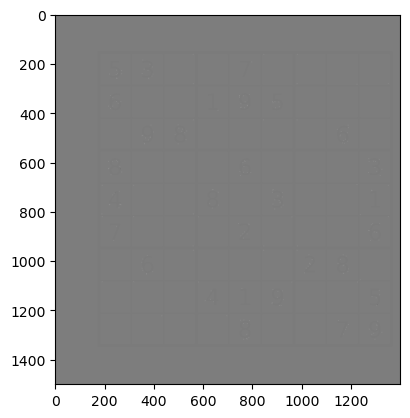

In [2]:
img = cv2.imread('input/sudoku.tif', 0)
plt.imshow(img, cmap='gray')

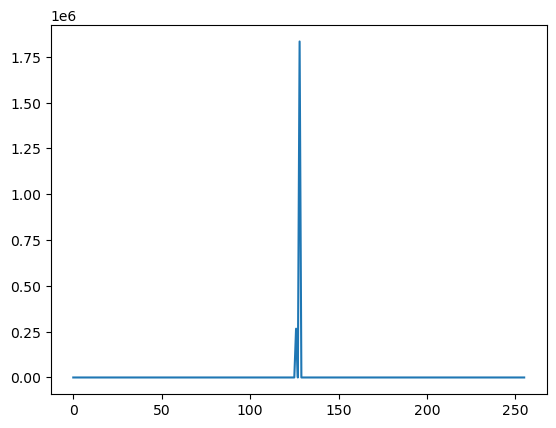

In [3]:
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(hist)

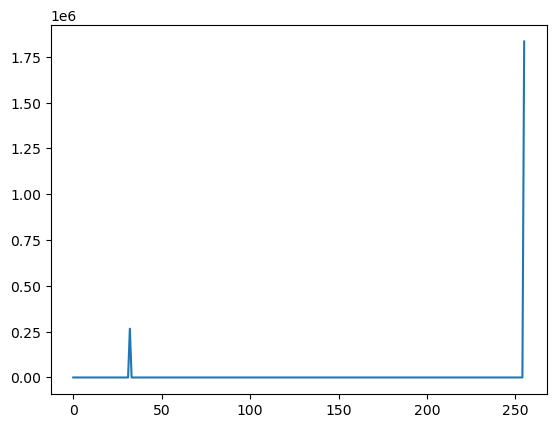

In [4]:
equ_img = cv2.equalizeHist(img)
hist_equ = cv2.calcHist([equ_img], [0], None, [256], [0, 256])
plt.plot(hist_equ)

True

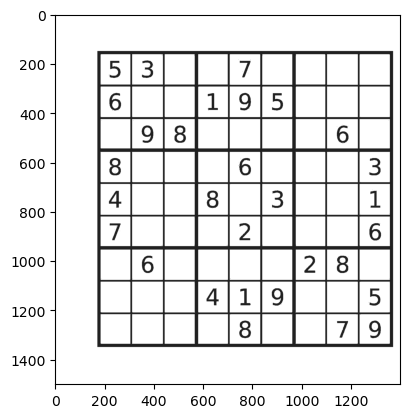

In [5]:
plt.imshow(equ_img, cmap='gray')
cv2.imwrite('output/sudoku_equalized.jpg', equ_img)

In [6]:
# Threshold the image to get a binary image
_, thresh = cv2.threshold(equ_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

In [7]:
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [8]:
# Find the largest contour, which should be the sudoku board
max_area = 0
max_contour = None
for c in contours:
    area = cv2.contourArea(c)
    if area > max_area:
        max_area = area
        max_contour = c

# Get the bounding rectangle of the largest contour
x, y, w, h = cv2.boundingRect(max_contour)
print(x, y, w, h)

172 150 1200 1200


In [9]:
# Draw a white rectangle over the border pixels
border = 5 # adjust this value as needed
cv2.rectangle(img, (x - border, y - border), (x + w + border, y + h + border), (255, 255, 255), 1)

array([[128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       ...,
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128],
       [128, 128, 128, ..., 128, 128, 128]], dtype=uint8)

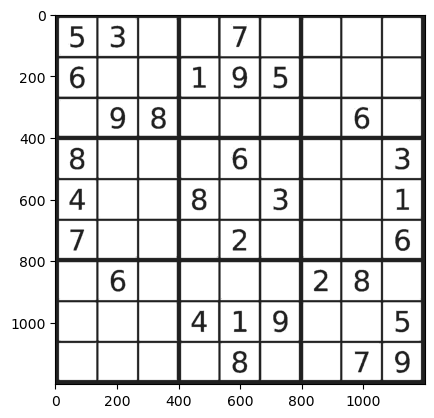

In [11]:
# Crop the image using the bounding rectangle coordinates
cropped = equ_img[y:y+h, x:x+w]
plt.imshow(cropped, cmap='gray')

In [15]:
# Divide the cropped image into a 9x9 grid of cells
cell_size = w // 9
cells = []
for i in range(9):
    row = []
    for j in range(9):
        # Get the coordinates of the cell
        x1 = j * cell_size
        y1 = i * cell_size
        x2 = x1 + cell_size
        y2 = y1 + cell_size

        # Extract the cell from the cropped image
        cell = cropped[y1+10:y2-10, x1+10:x2-10]

        # Append the cell to the row list
        row.append(cell)
    # Append the row list to the cells list
    cells.append(row)

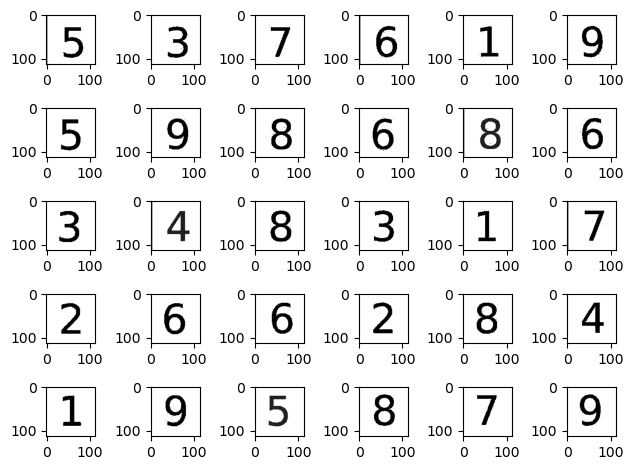

In [23]:
# Loop over each cell and check if it is non-empty
fig = plt.figure()
k = 0
for i in range(9):
    for j in range(9):
        cell = cells[i][j]
        if np.average(cell) < 240:
            cv2.imwrite(f'output/cell_{i}_{j}.jpg', cell)
            ax = fig.add_subplot(5, 6, k+1)
            ax.imshow(cell, cmap='gray')
            k += 1
plt.tight_layout()
plt.show()